<a href="https://colab.research.google.com/github/juanpalominoh/Fundamentos-de-Econometria/blob/main/Tema_3_Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 3: Ejercicio 1

*   **Nombre y Apellido:**
*   **Código PUCP:**


*   Deben subir el link de Colab en PAIDEIA de manera individual.
*   El límite de tiempo es hasta el viernes 02 de septiembre, 9:59am. 
*   Correr toda la programación hasta antes de la sección de Preguntas. Luego de ello, debe programar y contestar las preguntas.
*   Recuerden hacer una copia de este archivo para trabajar.
*   Deben hacer al menos 9 de las 10 preguntas para obtener el medio punto para el parcial.

In [ ]:
# Configurar el tiempo limite de carga 
options(timeout=3000)
getOption('timeout')

[1] 3000

Descargar el archivo del modulo 5 "Empleo e Ingresos" de la Encuesta Nacional de Hogares (ENAHO) 2021 desde la página del INEI: http://iinei.inei.gob.pe/microdatos/

In [ ]:
# Este código descarga el modulo 5 de la ENAHO 2021
if (!file.exists("759-Modulo05.zip")){
  download.file("http://iinei.inei.gob.pe/iinei/srienaho/descarga/STATA/759-Modulo05.zip", 
              "759-Modulo05.zip")
}

In [ ]:
# Actualizar la carpeta y descomprimir el archivo zipeado del modulo 5 
unzip("/content/759-Modulo05.zip")

Cargar el modulo 5 de la ENAHO 2021. 

**Sugerencia**: Revisar el Diccionario de la encuesta.

In [ ]:
# Cargar el modulo 5 de la ENAHO 
library(haven)
enaho_mod5 <- read_dta("/content/759-Modulo05/enaho01a-2021-500.dta")
enaho_mod5

aÑo,mes,conglome,vivienda,hogar,codperso,ubigeo,dominio,estrato,codinfor,⋯,i541a,ocu500,ocupinf,emplpsec,ticuest01a,tipocuestionario,fac500a,fac500_p,nconglome,sub_conglome
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl+lbl>,<dbl+lbl>,<chr>,⋯,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>,<chr>,<chr>
2021,02,005007,003,11,01,010101,4,4,01,⋯,NA,1,2,NA,2,2,68.58327,56.76555,007070,00
2021,02,005007,012,11,01,010101,4,4,01,⋯,549.00,1,1,2,2,2,86.84176,68.24212,007070,00
2021,02,005007,022,11,01,010101,4,4,01,⋯,NA,1,2,NA,2,2,42.10129,36.74661,007070,00
2021,02,005007,022,11,02,010101,4,4,01,⋯,NA,1,2,NA,2,2,33.74992,31.97783,007070,00
2021,02,005007,022,11,03,010101,4,4,03,⋯,NA,2,NA,NA,2,2,145.36197,108.83010,007070,00
2021,02,005007,050,11,01,010101,4,4,01,⋯,NA,4,NA,NA,2,2,21.14131,15.97688,007070,00
2021,02,005007,050,11,02,010101,4,4,02,⋯,NA,4,NA,NA,2,2,64.48965,48.55975,007070,00
2021,01,005009,041,11,01,010101,4,4,01,⋯,242.00,1,1,1,2,2,222.03047,158.88974,007076,00
2021,01,005009,041,11,02,010101,4,4,02,⋯,NA,1,1,1,2,2,706.45636,433.73288,007076,00


# Procesar datos

El paquete ***dplyr*** sirve para procesar la base de datos.

In [ ]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Ver los nombres de las variables. Revisar diccionario para saber que significa cada una de ellas.
names(enaho_mod5)

[1] "aÑo"              "mes"              "conglome"        
   [4] "vivienda"         "hogar"            "codperso"        
   [7] "ubigeo"           "dominio"          "estrato"         
  [10] "codinfor"         "p500a"            "p500b"           
  [13] "p500b1"           "p500c"            "p500d"           
  [16] "p500d1"           "p500n"            "p500i"           
  [19] "p501"             "p502"             "p503"            
  [22] "p504"             "p5041"            "p5042"           
  [25] "p5043"            "p5044"            "p5045"           
  [28] "p5046"            "p5047"            "p5048"           
  [31] "p5049"            "p50410"           "p50411"          
  [34] "p504a"            "p504b"            "p505"            
  [37] "p505r4"           "p505b"            "p506"            
  [40] "p506r4"           "p507"             "p508"            
  [43] "p509"             "p510"             "p510a1"          
  [46] "p510b"            "p5111"            "p5112"           
  [49] "p5113"            "p5114"            "p5115"           
  [52] "p5116"            "p5117"            "p5118"           
  [55] "p5119"            "p51110"           "p51111"          
  [58] "p51112"           "p511a"            "p512a"           
  [61] "p512b"            "p513"             "p513a"           
  [64] "p513b"            "p513c"            "p513d"           
  [67] "p513e"            "p513f"            "p513g"           
  [70] "p513t"            "p513a1"           "p513a2"          
  [73] "p514"             "p5151"            "p5152"           
  [76] "p5153"            "p5154"            "p5155"           
  [79] "p5156"            "p5157"            "p5158"           
  [82] "p5159"            "p51510"           "p51511"          
  [85] "p516"             "p516r4"           "p517"            
  [88] "p517a"            "p517b1"           "p517c"           
  [91] "p517d1"           "p517d2"           "p518"            
  [94] "p519"             "p520"             "p520a"           
  [97] "p521"             "p521a"            "p521b"           
 [100] "p521b1"           "p521c"            "p521d"           
 [103] "p522a"            "p522b"            "p522c"           
 [106] "p523"             "p524a1"           "p524a2"          
 [109] "p524b1"           "p524b2"           "p524c1"          
 [112] "p524c2"           "p524d1"           "p524d2"          
 [115] "p524e1"           "p524e2"           "p528"            
 [118] "p5291a"           "p5291b"           "p5291c"          
 [121] "p5292a"           "p5292b"           "p5292c"          
 [124] "p5293a"           "p5293b"           "p5293c"          
 [127] "p5294a"           "p5294b"           "p5294c"          
 [130] "p5295a"           "p5295b"           "p5295c"          
 [133] "p5296a"           "p5296b"           "p5296c"          
 [136] "p529t"            "p529h"            "p529i"           
 [139] "p529j"            "p5297a"           "p530a"           
 [142] "p530b"            "p535"             "p536"            
 [145] "p5371"            "p5372"            "p5373"           
 [148] "p5374"            "p5375"            "p5376"           
 [151] "p5377"            "p5378"            "p5379"           
 [154] "p53710"           "p53711"           "p53712"          
 [157] "p538a1"           "p538a2"           "p538b1"          
 [160] "p538b2"           "p538c1"           "p538c2"          
 [163] "p538d1"           "p538d2"           "p538e1"          
 [166] "p538e2"           "p538a_1"          "p538a_2"         
 [169] "p538a_3"          "p539"             "p5401a"          
 [172] "p5401b"           "p5401c"           "p5402a"          
 [175] "p5402b"           "p5402c"           "p5403a"          
 [178] "p5403b"           "p5403c"           "p5404a"          
 [181] "p5404b"           "p5404c"           "p5405a"          
 [184] "p5405b"           "p5405c"           "p5406a"          
 [187] "p5406b"           "p5406c" 

In [ ]:
base <- enaho_mod5 %>%
  rename(edad=p208a) %>%
  rowwise() %>% 
  mutate(ingreso = 1+sum(i524a1, d529t, i530a, d536, i538a1, d540t, i541a, d543, d544t, 
                   na.rm=TRUE)) %>%
  mutate(lnwage=log(ingreso)) %>%
  select(aÑo, conglome, vivienda, hogar, codperso, edad, ingreso, lnwage)
base 

aÑo,conglome,vivienda,hogar,codperso,edad,ingreso,lnwage
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2021,005007,003,11,01,56,77204.127,11.254208
2021,005007,012,11,01,21,12746.990,9.453050
2021,005007,022,11,01,62,26696.982,10.192306
2021,005007,022,11,02,61,19431.525,9.874652
2021,005007,022,11,03,29,1.000,0.000000
2021,005007,050,11,01,88,1.000,0.000000
2021,005007,050,11,02,79,1.000,0.000000
2021,005009,041,11,01,62,4772.000,8.470521
2021,005009,041,11,02,30,1.000,0.000000


# **Preguntas**

1. Estimar el modelo:
\begin{gather*}
log(ingreso) = \beta_{1} + \beta_{2} edad + \epsilon
\end{gather*}

In [ ]:
model <- lm(lnwage ~ edad, data = base)
summary(model)


Call:
lm(formula = lnwage ~ edad, data = base)

Residuals:
   Min     1Q Median     3Q    Max 
-6.286 -5.062  2.490  4.135  7.791 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept) 4.6432839  0.0371539  124.97 <0.0000000000000002 ***
edad        0.0167666  0.0007994   20.97 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.559 on 86804 degrees of freedom
Multiple R-squared:  0.005042,	Adjusted R-squared:  0.005031 
F-statistic: 439.9 on 1 and 86804 DF,  p-value: < 0.00000000000000022


2. Calcular con expresiones algebráicas los coeficientes $\hat{\beta}_{1}$ y $\hat{\beta}_{2}$. Puede hacerlo con el modelo en desviaciones. Comparar si son identicos a la regresión estimada en el punto (1).

In [ ]:
mX <- mean(base$edad)
mY <- mean(base$lnwage)
dX <- base$edad - mX
dY <- base$lnwage - mY
xy <- dX*dY
sq_X <- dX^2

In [ ]:
options(scipen=999)
sum(dY)
sum(dX)

[1] -0.00000000002171063

[1] 0.0000000002285958

In [ ]:
beta2 <- sum(xy)/sum(sq_X)
beta1 <- mY - (beta2*mX)

beta1
beta2

[1] 4.643284

[1] 0.01676657

3. Calcular $\hat{Y}_{i}$, los residuos del modelo, y los residuos al cuadrado.

\begin{gather*}
\hat{Y}_{i}= \hat{\beta}_{1} + \hat{\beta}_{2}X_{i}
\end{gather*}

In [ ]:
Y_hat <- beta1 + beta2*base$edad
e <- base$lnwage - Y_hat
sq_e <- e^2

In [ ]:
sum(e)

[1] -0.00000000004031087

4. Calcular el estimador de $\sigma^{2}$:

\begin{gather*}
\hat{\sigma^{2}}= \frac{\sum \hat{\epsilon}_{i}^{2}}{n-2}
\end{gather*}

In [ ]:
sigma2_hat <- sum(sq_e)/(nrow(base)-2)
sigma2_hat

[1] 20.78322

5. Calcular las varianzas de $\hat{\beta}_{1}$ y $\hat{\beta}_{2}$. ¿Son los mismos errores estándar que lo hallado en (1)?

\begin{gather*}
\hat{Var}(\hat{\beta}_{1})=\hat{\sigma}^{2}(\frac{1}{n}+\frac{\bar{X}^{2}}{\sum x^{2}_{i}})
\end{gather*}

\begin{gather*}
\hat{Var}(\hat{\beta}_{2})=\frac{\hat{\sigma}^{2}}{\sum x_{i}^{2}}
\end{gather*}

In [ ]:
var_beta1 <- sigma2_hat*((1/nrow(base)) + ((mX^2)/sum(sq_X)))
var_beta2 <- sigma2_hat / sum(sq_X)
sqrt(var_beta1)
sqrt(var_beta2)

[1] 0.03715394

[1] 0.000799385

6. Hallar SCT, SCE y SCR. Compararlo con lo hallado en (1)

In [ ]:
scr <- sum((fitted(model) - base$lnwage)^2)
sce <- sum((fitted(model) - mean(base$lnwage))^2)
sct <- scr + sce
scr
sce
sct

[1] 1804067

[1] 9143.017

[1] 1813210

7. Calcular $R^{2}$. Compararlo con lo hallado en (1)

In [ ]:
r2 <- sce / sct
r2

[1] 0.005042449

8. Calcular el t-student

In [ ]:
t1 <- model$coefficients[1]/summary(model)$coefficients[1,2]
t2 <- model$coefficients[2]/summary(model)$coefficients[2,2]
t1
t2

(Intercept) 
   124.9742

edad 
20.97434

9. ¿Son significativos los coeficientes? ¿A qué nivel de significancia (10%, 5%, y 1%)?

Los coeficientes son significativos al 1% dado que el p-value es menor a 0.01.

10. Interprete el coeficiente $\beta_{2}$

Un año más de vida tiene un efecto positivo de 1.67% en los ingresos.

11. Hacer un gráfico de la relación entre $lnwage$ y $educ$. Agregar la línea de predicción. Ver el código de "Modelo Lineal Bivariado".

In [ ]:
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



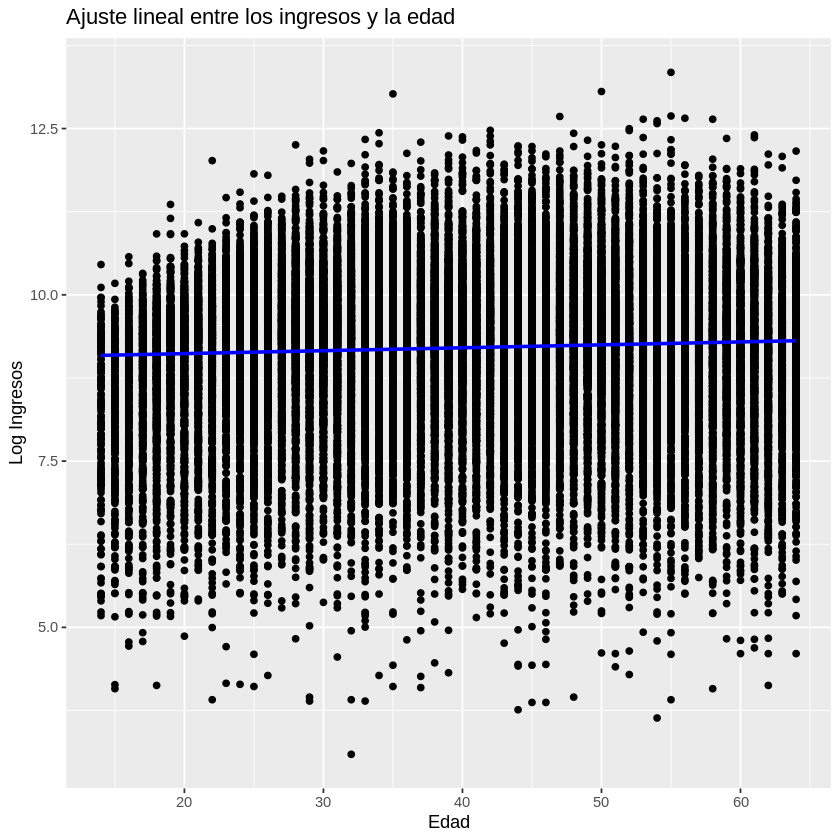

In [ ]:
ggplot(data = base %>%
            filter(edad<=64) %>%
            filter(lnwage!=0),
            aes (x=edad, y=lnwage))+
            geom_point() +
            geom_smooth(method = "lm", color= "blue", se=T) + 
              labs (x="Edad", y="Log Ingresos", 
              title = "Ajuste lineal entre los ingresos y la edad")